In [1]:
import numpy as np
from simplelandscape import (
    flat_energy, linear_energy, logistic_energy, quadratic_energy,
    umbrella_bias, OneDimLandscape)
from remd import RemdLadder
import adapt
from matplotlib import pyplot as pp
%matplotlib inline
%load_ext line_profiler

In [2]:
ladder_func = RemdLadder
opt_func = adapt.compute_derivative_log_total_acc

In [3]:
n_cond = 4
bias_x = np.linspace(450, 550, n_cond, dtype=int)
bias_x[-1] = 550

walkers = []
for x in bias_x:
    p = np.array((x, 0.01))
    w = OneDimLandscape(logistic_energy, umbrella_bias, x, p)
    walkers.append(w)

r = ladder_func(walkers)

In [4]:
n_steps = 2000
coords = np.zeros((n_steps, n_cond))
for i in range(n_steps):
    r.update()
    x = np.array([w.x for w in r.walkers])
    coords[i, :] = x

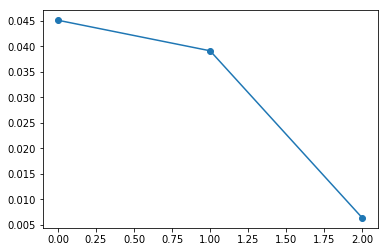

In [5]:
acc1 = r.acceptance.copy()
a1 = np.product(acc1)
pp.plot(acc1, marker='o')
#pp.ylim(0, 1)


In [6]:
param_bounds = np.array([[0, 0*0.01], [1000, 0.015]])
# lr = adapt.LearningRateDecay(np.array((2, 4e-8)), 0*5e-2)
# m = adapt.MomentumSGD(0.9, opt_func, lr, param_bounds)
lr = adapt.LearningRateDecay(np.array((1, 1e-4)), 1e-3)
m = adapt.Adam(0.9, 0.999, adapt.compute_derivative_log_total_acc, lr, param_bounds)
a = adapt.Adaptor(r, 1, m)

In [7]:
a.run(25000)

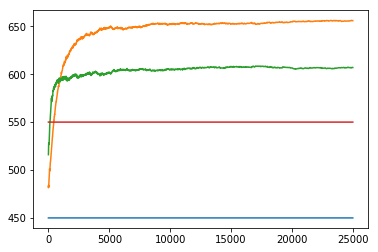

In [8]:
params = np.array(a.params)
pp.plot(params[:, :, 0]);

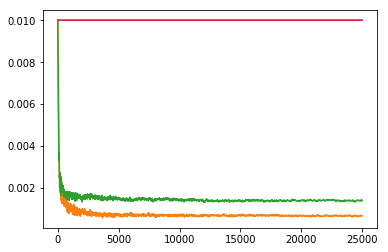

In [9]:
pp.plot(params[:, :, 1])
#pp.ylim(0, 0.004);

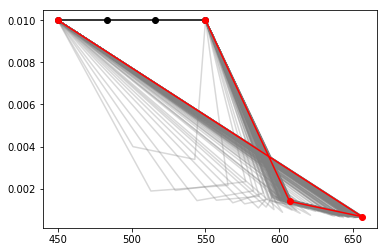

In [10]:
q = np.transpose(params, (1, 2, 0))
pp.plot(q[:, 0, ::100], q[:, 1, ::100], color='grey', alpha=0.3)
pp.plot(q[:, 0, 0], q[:, 1, 0], color='black', marker='o')
pp.plot(q[:, 0, -1], q[:, 1, -1], color='red', marker='o');

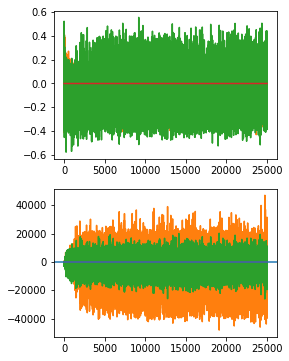

In [11]:
pp.figure(figsize=(4, 6))
derivs = np.array(m.derivs)
pp.subplot(2, 1, 1)
pp.plot(derivs[:, :, 0])
pp.subplot(2, 1, 2)
pp.plot(derivs[:, :, 1])
pp.axhline(0);

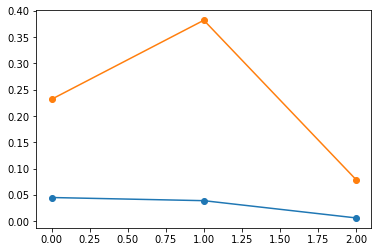

In [12]:
for i in range(n_steps):
    r.update()

acc2 = r.acceptance.copy()
a2 = np.product(acc2)
pp.plot(acc1, marker='o')
pp.plot(acc2, marker='o')
#pp.ylim(0, 1)

In [13]:
print a1, a2, a2 / a1

1.122450405e-05 0.0070016728003 623.784602784


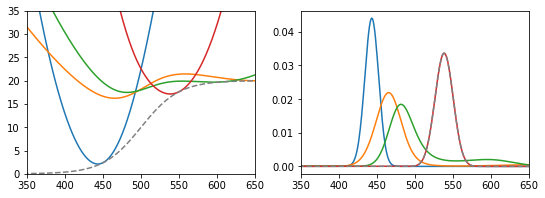

In [14]:
pp.figure(figsize=(9,3))

xs = np.array(range(1000))
y1 = logistic_energy(xs)
for i in range(n_cond):
    pp.subplot(1, 2, 1)
    parms = params[-1, i, :]
    y2 = umbrella_bias(xs, parms)[:, 0]
    y = y1 + y2
    pp.plot(xs, y)
    
    pp.subplot(1, 2, 2)
    p = np.exp(-y)
    p /= np.sum(p)
    pp.plot(xs, p)

pp.subplot(1, 2, 1)
pp.plot(xs, y1, color='grey', linestyle='--')
pp.ylim(0, 35)
pp.xlim(350, 650);

pp.subplot(1, 2, 2)
pp.plot(xs, p, color='grey', linestyle='--')
pp.xlim(350, 650);
